In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

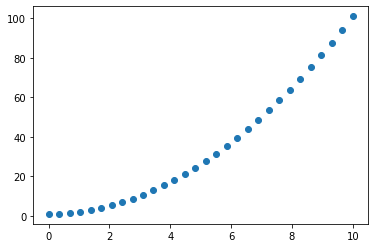

In [10]:
# Генерация данных
x = np.array(np.linspace(0, 10, 30))
# Функция задачи
y = np.power(x, 2) + 1


# Построение графика
plt.scatter(x, y)
plt.show()

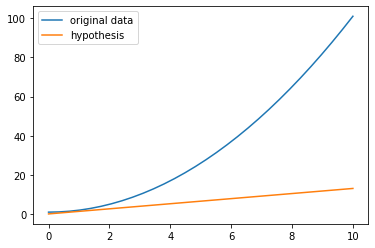

In [11]:
x = np.matrix(np.linspace(0,10,30)).T
y = np.power(x, 2) + 1
# создание матрицы единиц
m = x.size
ones = np.ones([m, 1])

# объединение единиц в элементе X
X = np.concatenate((ones, x), axis = 1)

# создание весов коэффициентов регрессии
theta = np.matrix('0.1;1.3')
theta

# matrix([[0.1],
#         [1.3]])

# Исчисление: y = theta_0 + theta_1 * x
# Алгебра: A*x (тета) = Y(b)

# Просим модель предсказывать 
y_pred_h = np.dot(X, theta)

# Строим
plt.plot(x, y, label = 'original data')
plt.plot(x, y_pred_h, label = 'hypothesis')
plt.legend()
plt.show()


MSE= 1898.13


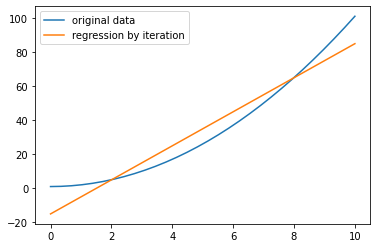

In [12]:
# создание коэффициента скорости обучения и количества итераций
alpha = 0.05
epochs = 500 # итерации

#Обучение модели
def updateTheta(theta, y_original, y_pred):
    error = y_pred - y_original
    
    theta[0][0] -= alpha*(1/m)*np.sum(np.multiply(error, X[:,0]))
    theta[1][0] -= alpha*(1/m)*np.sum(np.multiply(error, X[:,1]))

    return theta

for i in range(epochs):
    theta = updateTheta(theta, y, y_pred_h)
    y_pred_h = np.dot(X, theta)
    
MSE = np.sum(np.power((y_pred_h - y), 2))
print('MSE= %.2f' % MSE) 
    
plt.plot(x, y, label = 'original data')
plt.plot(x, y_pred_h, label = 'regression by iteration')
plt.legend()
plt.show()

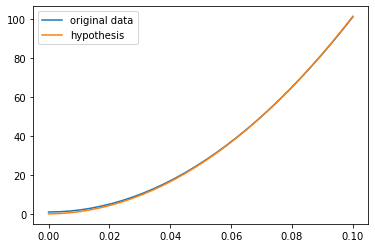

In [18]:
#Task #1 Алгоритм градиентного спуска

# уравнение вида Ax=b, A - входные данные (X), x - веса (тета), b (наблюдаемые значения Y)
A = X
B = y

A = np.concatenate((A, np.power(A[:,1], 2)), axis = 1)

# Нормализация
A = A/A.max()

# создание весов коэффициентов регрессии
weights = np.matrix('0.1;1.3;0.6')
alpha = 1
epoch = 50

# функция гипотезы
def hypothesisY(X, weights):
    return np.dot(X, weights)

# Среднеквадратическая ошибка
def MSE(X, y, weights):
    y_pred = hypothesisY(X, weights)
    return np.sum(np.sqrt(np.square(y - y_pred)))/(2*m)

# Алгоритм градиентного спуска
def PolynomialRegressionFit(X, y):
    # array of costs
    mse = []
    
    for i in range(epoch):
        # найти гипотезу
        y_pred = hypothesisY(X, weights)
        
        for j in range(X.shape[1]): 
            error = y_pred - y
            weights[j][0] -= alpha*(1/m)*np.sum(np.multiply(error, X[:, j]))
        
        # Расчет отклонения
        mse.append(MSE(X, y, weights))
    
    return mse, weights

# подгонка модели
PolynomialRegressionFit(A, B)


# вычисление значений Y с учетом весов (гипотеза)
y_pred_h = hypothesisY(A, weights)

# Постройка
plt.plot(A[:,1], B, label = 'original data')
plt.plot(A[:,1], y_pred_h, label = 'hypothesis')
plt.legend()
plt.show()

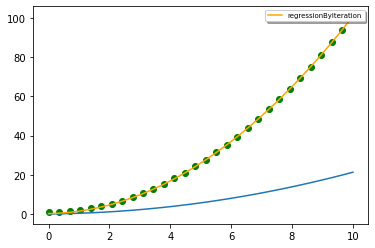

regressionByIteration mse=  3.034250014197495
regressionByIteration takes  0.13167357444763184


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import time

def regressionByIteration():
    xr=np.matrix(np.linspace(0,10,30))
    x=xr.T
    y=np.power(x,2)+1
    plt.plot(x,y, 'og', color='green')
    m=x.size
    on=np.ones([m,1])
    X=np.concatenate((on,x),axis=1)
    #
    X_2 = np.power(X[:,1],2)
    #
    X = np.concatenate((X, X_2), axis=1)
    #
    X = X/10
    #
    theta=np.matrix('0.1;1.3;2')
    #
    h=np.dot(X,theta)
    #h=np.dot(X + y,theta)
    plt.plot(x,h)

    #параметр обучения a
    alpha=0.05
    #максимальное кол-во итераций
    iter=50
    
    for i in range(iter):
        h=np.dot(X,theta)
        theta[0][0]=theta[0][0]-alpha*(1/m)*np.sum(h-y)
        theta[1][0]=theta[1][0]-alpha*(1/m)*np.sum(np.multiply(h-y, X[:, 1]))
        theta[2][0]=theta[2][0]-alpha*(1/m)*np.sum(np.multiply(h-y, X[:, 2]))
   
    plt.figure(1)
    plt.plot(x,h,label='regressionByIteration', color='orange')   
    leg=plt.legend(loc='upper right',shadow=True,fontsize='x-small')
    plt.show()
    
    mse=np.sum(np.power((h-y),2))
    print('regressionByIteration mse= ', mse)
    
t0=time.time()    
regressionByIteration()  
t1=time.time()
print('regressionByIteration takes ',(t1-t0))

def Matrix_regression():
    xr=np.matrix(np.linspace(0,10,30))
    x=xr.T
    y=np.power(x,2)+1
    plt.plot(x,y, 'og', color='green')
    m=x.sizeя
    
    on=np.ones([m,1])
    X=np.concatenate((on,x),axis=1)
    values = np.power(X[:,1],2)
    X = np.concatenate((X, values), axis=1)
    X = X/10
    
    theta=np.dot(np.linalg.inv(np.dot(X.T,X)) , np.dot(X.T,y))
    
    h = np.dot(X, theta)
    
    plt.figure(1)
    
    plt.plot(x,h,label='regressionByIteration', color='r') 
    leg=plt.legend(loc='upper right',shadow=True,fontsize='x-small')
    
    mse=np.sum(np.power((h-y),2))
    print('regressionByIteration mse= ', mse)

t0=time.time()    
    
Matrix_regression()
t1=time.time()
print('regressionByIteration takes ',(t1-t0))

In [ ]:
x = np.array(1,1,1,1,1)
y = np.array(2,2,2,2,2)

result = np.dot(x,y)
return result

In [ ]:
b = np.array([[-1, 33, 4, 1],
[0, 1, 1, 0]])

result = b.mean()
result

In [ ]:
a = np.array([[2,4,0,4,1],[2,4,1,1,0],[1,1,1,2,2],[0,1,3,2,2],[2,2,2,0,2]])

a = a.T
a = np.linalg.inv(a)

a = np.diagonal(a)


print(np.sum(a))

In [7]:
a = np.array([[3,3,3],[1,3,4],[7,1,3]])

result = np.unique(a)

result

array([1, 3, 4, 7])